# 2.5 Unsupervised Learning - Clustering
## *Steps:*
1. Apply K-Means Clustering (elbow method to determine K).
2. Perform Hierarchical Clustering (dendrogram analysis).
3. Compare clusters with actual disease labels.
## *Deliverable:*
✔️ Clustering models with visualized results

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/features_selected_rfe.csv')
#data = pd.read_csv('../data/features_selected_chi.csv')
X = data.drop(columns=['num'])
y = data['num']

## Determining the optimal value of K by the elbow method

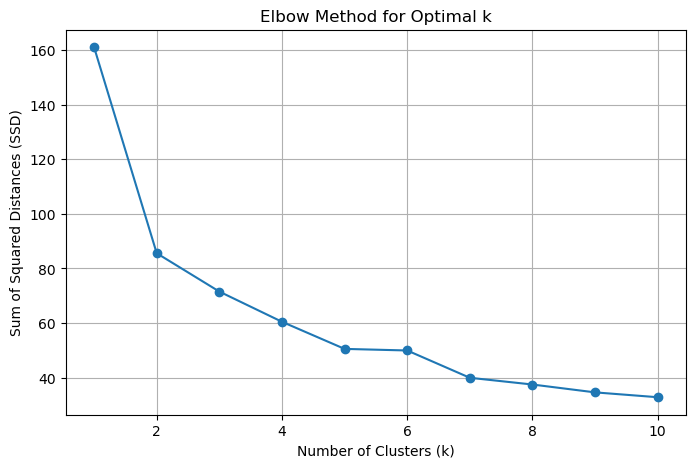

In [3]:
ssd = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid()
plt.show()

## KMeans Clustering

In [4]:
kmeans = KMeans(n_clusters=2,random_state=42)
data['cluster'] = kmeans.fit_predict(X)

## Hierarchical Clustering

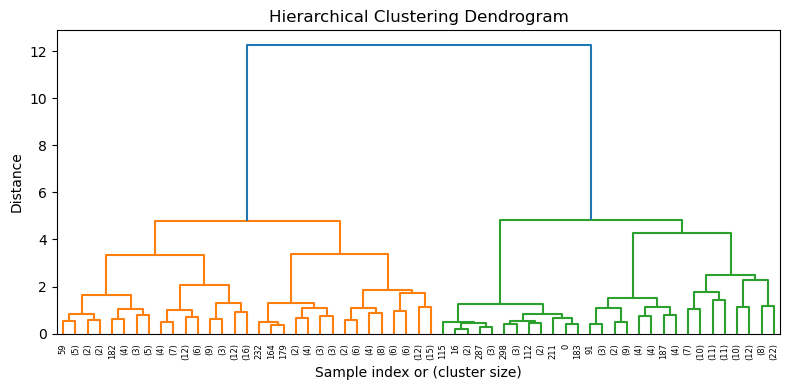

In [5]:
Z = sch.linkage(X, method='ward')
plt.figure(figsize=(8, 4))
sch.dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

## Compare clusters with actual disease labels

In [6]:
y_pred = kmeans.fit_predict(X)

ari = adjusted_rand_score(y, y_pred)
nmi = normalized_mutual_info_score(y, y_pred)

print(f'Adjusted Rand Index: {ari:.4f}')
print(f'Normalized Mutual Information: {nmi:.4f}')

Adjusted Rand Index: 0.2729
Normalized Mutual Information: 0.2061


<Figure size 1200x800 with 0 Axes>

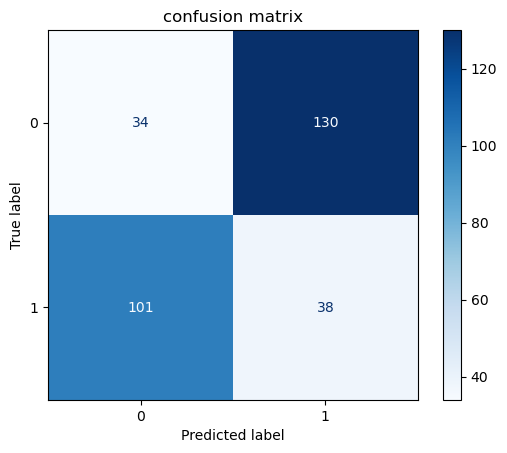

In [7]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title('confusion matrix')
plt.show()